## Module 5 Project: NBA Position Clustering

Please fill out:  
  Student name: Gabriel Blatstein  
  Student pace: Part Time  
  Scheduled project review date/time:  
  Instructor name: Brandon Lewis    
  Blog post URL:XXXXX


Proposal:  
I would like to use NBA stats data from NBA.com to train a model that will classify a players position given historical stats. Due to the NBA shifting into a position-less basketball style of play, I think this would be a interesting topic to research.    

I plan to use K-Means Non-Heirarchical to accomplish this. The reason behind this algo is because we know there are only 5 positions in the NBA: PG, SG, SF, PF, C.

I decided to first use data that was already available to me through Kaggle and other internet resources. I wanted to focus on figuring out the parameters of the model and also focus on the machine learning aspect.  

Through research I found a great excel data set that has every player in the NBA dating back to 1950.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import operator
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [2]:
raw_player= pd.read_csv(r'C:\Users\GBLS\Desktop\player_data.csv')

In [3]:
raw_player.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [4]:
player_df= raw_player[['name','height','weight']]

In [5]:
player_df.isna().sum()

name      0
height    1
weight    6
dtype: int64

In [6]:
player_df= player_df.fillna(0)

In [7]:
player_df.isna().sum()

name      0
height    0
weight    0
dtype: int64

In [8]:
player_df['Feet']= player_df['height'].str[0]

In [9]:
player_df['Inches']= player_df['height'].str[2:]

In [10]:
player_df=player_df.dropna()

In [11]:
player_df['Height_Inches']= (player_df['Feet'].astype('float64')*12) + (player_df['Inches'].astype('float64'))

In [12]:
player_df = player_df.drop(['Feet', 'height', 'Inches'], axis=1)

In [13]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4549 entries, 0 to 4549
Data columns (total 3 columns):
name             4549 non-null object
weight           4549 non-null float64
Height_Inches    4549 non-null float64
dtypes: float64(2), object(1)
memory usage: 142.2+ KB


In [14]:
player_df.head()

,name,weight,Height_Inches
0,Alaa Abdelnaby,240.0,82.0
1,Zaid Abdul-Aziz,235.0,81.0
2,Kareem Abdul-Jabbar,225.0,86.0
3,Mahmoud Abdul-Rauf,162.0,73.0
4,Tariq Abdul-Wahad,223.0,78.0


In [15]:
# raw_df=pd.read_csv('/Users/gabrielblatstein/Downloads/nba-players-stats/Seasons_Stats.csv')
raw_df= pd.read_csv(r'C:\Users\GBLS\Desktop\Seasons_Stats.csv')
raw_df.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [16]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 53 columns):
Unnamed: 0    24691 non-null int64
Year          24624 non-null float64
Player        24624 non-null object
Pos           24624 non-null object
Age           24616 non-null float64
Tm            24624 non-null object
G             24624 non-null float64
GS            18233 non-null float64
MP            24138 non-null float64
PER           24101 non-null float64
TS%           24538 non-null float64
3PAr          18839 non-null float64
FTr           24525 non-null float64
ORB%          20792 non-null float64
DRB%          20792 non-null float64
TRB%          21571 non-null float64
AST%          22555 non-null float64
STL%          20792 non-null float64
BLK%          20792 non-null float64
TOV%          19582 non-null float64
USG%          19640 non-null float64
blanl         0 non-null float64
OWS           24585 non-null float64
DWS           24585 non-null float64
WS          

In [17]:
raw_df.isna().sum()

Unnamed: 0        0
Year             67
Player           67
Pos              67
Age              75
Tm               67
G                67
GS             6458
MP              553
PER             590
TS%             153
3PAr           5852
FTr             166
ORB%           3899
DRB%           3899
TRB%           3120
AST%           2136
STL%           3899
BLK%           3899
TOV%           5109
USG%           5051
blanl         24691
OWS             106
DWS             106
WS              106
WS/48           590
blank2        24691
OBPM           3894
DBPM           3894
BPM            3894
VORP           3894
FG               67
FGA              67
FG%             166
3P             5764
3PA            5764
3P%            9275
2P               67
2PA              67
2P%             195
eFG%            166
FT               67
FTA              67
FT%             925
ORB            3894
DRB            3894
TRB             379
AST              67
STL            3894
BLK            3894


In [18]:
raw_df['blank2'].unique()

array([nan])

In [19]:
raw_df['blanl'].unique()

array([nan])

In [20]:
raw_df= raw_df.drop(['blanl', 'blank2', 'Unnamed: 0'], axis= 1)

In [21]:
raw_df.drop_duplicates('Player',keep='first',inplace=True)

In [22]:
raw_df=pd.merge(raw_df,player_df,left_on='Player',right_on='name')

In [23]:
raw_df= raw_df.drop('name', axis=1)

Due to the evolving style of play in the NBA, I decided to split up the dataset. I researched the NBA rule changes and things like when certain positions were introduced.  For example, guard use to be a position, but currently there is a shooting guard or a point guard. The same goes for Forward, as today we have Power Forward and Small Forward. 

Other key dates are outlined below:

1946-1956: There were two independent leagues the Basketball Association of America (BAA) and the National Basketball League (NBL). The NBL merged in 1949 with the BAA and the a new name was coined, the National Basketball Association (NBA). 

1956-1979: The Celtics dominated this time period with the likes of Bill Russel winning 8 straight championships. During the years of 1966 to 1968 the NBA expanded from 9 to 14 teams during this time period. Then in slowly but surely teams were added throughout the years to reach a total of 22 teams in 1977.

1979-1998: The three point line was added from the ABA in 1979. This kicked off the rivalry of Larry Bird (Celtic) and Magic Johnson (Laker) for the next ten years battled for 8 titles in total. Jordan enters the league in 1984, and then four years later(1988) four more teams were added brining the total to 27. Jordan led the Bulls to two 3-peat championships during eight seasons. This led to the term of dynasties that started to form over the next decade.

1998-2014: The Lakers and Spurs over this time period formed two separate dynasties. The Spurs or Lakers combined to make 13 Finals in 16 seasons, with 10 titles amongst each other. The Lakers dynasty was led by the great Kobe Bryant and Shaquille O'Neal. On the other end, the Spurs dynasty was highlighted by Tim Duncan and David Robinson. In 2007, Lebron James and the Cavaliers were swept by the Spurs, with the Spurs once again asserting their dynasty dominance. 

At the start of the 2010-2011 season, the league was shocked by the Decision. Lebron James decided to take his talents to South Beach Miami to join Dwayne Wade and newly signed Chris Bosh. Lebron would go on to win two championships with the Miami Heat along with starting his record setting 8 NBA finals appearances. 

2014-Present: Just like the Celtics and Laker rivalry, a new rivalry formed. When Lebron decided in 2014 to go back to the city of Cleveland and bring a championship to Cleveland, a new rivalry was formed. The Cavaliers led by Lebron would face off with the Warriors led by Steph Curry and Klay Thompson in the 2014-2015, 2015-2016, 2017-2018. In the 2015-2016 Lebron James brought Cleveland's first NBA championship to the city to end their championship drought. Lebron then decided to take his talents to the Lakers at the start of the 2018 NBA season. 

The Warriors dynasty finally came to a end when Kevin Durant went down with two injuries in the 2019 finals against Kwahi Leonard and the Toronto Raptors. The Raptors took advantage of a injured Warriors squad and won the 2019 finals. Kevin Durant then decided to move teams to the Brooklyn Nets to join forces with Kyrie Irving. The NBA is now very shaken up and will be a very exciting. 



In [24]:
NBA_1950_1956= raw_df[raw_df['Year']<1957]
NBA_1957_1979= raw_df[(raw_df['Year']>1956)&(raw_df['Year']<1980)]
NBA_1980_1998= raw_df[(raw_df['Year']>1979)&(raw_df['Year']<1999)]
NBA_1999_2017= raw_df[raw_df['Year']>1998]

Function Definitions

In [25]:
def heatmap(df):
    corrmat = df.corr()
    top_corr_features = corrmat.index
    plt.figure(figsize=(20,20))
    #plot heat map
    g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [26]:
def Position_num(df):    
    df.at[df['Pos']=='PG', 'Pos'] = 1
    df.at[df['Pos']=='PG-SG','Pos']= 1
    df.at[df['Pos']=='PG-SF', 'Pos']= 1
    df.at[df['Pos']=='SG', 'Pos']= 2
    df.at[df['Pos']=='SG-PG', 'Pos']= 2
    df.at[df['Pos']=='SG-SF', 'Pos']= 2
    df.at[df['Pos']=='G', 'Pos']= 2
    df.at[df['Pos']=='SF', 'Pos']= 3
    df.at[df['Pos']=='SF-PG', 'Pos']= 3
    df.at[df['Pos']=='SF-PF', 'Pos']= 3
    df.at[df['Pos']=='SF-SG', 'Pos']= 3
    df.at[df['Pos']=='F-G', 'Pos']= 3
    df.at[df['Pos']=='F', 'Pos']= 3
    df.at[df['Pos']=='G-F', 'Pos']= 3
    df.at[df['Pos']=='PF', 'Pos']= 4
    df.at[df['Pos']=='F-C', 'Pos']= 4
    df.at[df['Pos']=='PF-SF', 'Pos']= 4
    df.at[df['Pos']=='SG-PF', 'Pos']= 4
    df.at[df['Pos']=='C', 'Pos']= 5
    df.at[df['Pos']=='C-F', 'Pos']= 5
    df.at[df['Pos']=='C-SF', 'Pos']= 5
    df.at[df['Pos']=='PF-C', 'Pos']= 5
    df.at[df['Pos']=='C-PF', 'Pos']= 5
    df.at[df['Pos']=='C-SF', 'Pos']= 5
#     df.astype

In [27]:
# def kmeans(data,clusters):
#     kmeans= KMeans(n_clusters=5)
#     kmeans.fit(data)
#     y_hat= kmeans.predict(data)
#     labels = kmeans.labels_
#     return metrics.silhouette_score(data, labels, metric='euclidean')

# Might not need because it is not classification?

In [28]:
def train_test(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)
    

In [29]:
def random_forest(df,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)
    clf= RandomForestClassifier(random_state=0)
    clf.fit(X_train, y_train)
    preds= clf.predict(X_test)
    acc = round(accuracy_score(preds, y_test) * 100,2)
    print("Accuracy is :{0}%".format(acc))
    feat_importances = pd.DataFrame(clf.feature_importances_, index=X.columns, columns=['Score'])
    feat_importances = feat_importances.sort_values(by='Score',ascending=True)
    feat_importances.plot(kind='barh')
    plt.show()
    pd.crosstab(y_test, preds, rownames=['Actual Result'], colnames=['Predicted Result'])
    
    Refined_X=feat_importances.index[-10:]
    X_key_features=df[Refined_X]
    y_key_features=df['Pos']

    X_train, X_test, y_train, y_test = train_test_split(X_key_features,y_key_features, test_size=.2)
    clf= RandomForestClassifier()
    clf.fit(X_train, y_train)
    preds= clf.predict(X_test)
    acc = round(accuracy_score(preds, y_test) * 100,2)
    print("Accuracy is :{0}%".format(acc))
    feat_importances = pd.DataFrame(clf.feature_importances_, index=X_key_features.columns, columns=['Score'])
    feat_importances = feat_importances.sort_values(by='Score',ascending=True)
    feat_importances.plot(kind='barh')
    plt.show()
    print(classification_report(y_test,preds))
    return pd.crosstab(y_test, preds, rownames=['Actual Result'], colnames=['Predicted Result'])


In [30]:
def SVM(df,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)
    svclassifier = SVC(kernel='linear')
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    pd.crosstab(y_test, y_pred, rownames=['Actual Result'], colnames=['Predicted Result'])
    acc = round(accuracy_score(y_pred, y_test) * 100,2)
    print("Accuracy is :{0}%".format(acc))
    print(classification_report(y_test,y_pred))

In [53]:
def KNN(df, X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)
#     scaler = StandardScaler()
#     scaled_data_train = scaler.fit_transform(X_train)
#     scaled_data_test = scaler.transform(X_test)

#     scaled_df_train = pd.DataFrame(scaled_data_train, columns=X.columns)
#     scaled_df_train.head()

    clf= KNeighborsClassifier()
    clf.fit(X_train, y_train)
    test_preds= clf.predict(X_test)
    acc = round(accuracy_score(test_preds, y_test) * 100,2)
    print("Accuracy is :{0}%".format(acc))
    print(classification_report(y_test,test_preds))

    k_range =range(1,25)
    scores= {}
    scores_list= []

    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        test_preds=knn.predict(X_test)
        scores[k] = metrics.accuracy_score(y_test, test_preds)
        scores_list.append(metrics.accuracy_score(y_test, test_preds))

    plt.plot(k_range, scores_list)
    plt.xlabel('Value of K')
    plt.ylabel('Testing Accuracy')
    plt.show()

    max(scores.items(), key=operator.itemgetter(1))[0] , max(scores.items(), key=operator.itemgetter(1))[1]

    optimal_k= max(scores.items(), key=operator.itemgetter(1))[0]

    clf= KNeighborsClassifier(n_neighbors=6)
    clf.fit(X_train, y_train)
    test_preds= clf.predict(X_test)
    acc = round(accuracy_score(test_preds, y_test) * 100,2)
    print("Accuracy is :{0}%".format(acc))
    print(classification_report(y_test,test_preds))
    return pd.crosstab(y_test, test_preds, rownames=['Actual Result'], colnames=['Predicted Result'])

In [54]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
def ADABOOST(X, y):
    scaler=StandardScaler()
    scaled_X= scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=.2)

    # gbt_clf = GradientBoostingClassifier()
    # gbt_clf.fit(X_train, y_train)

    adaboost_clf = AdaBoostClassifier()
    adaboost_clf.fit(X_train, y_train)
    y_pred= adaboost_clf.predict(X_test)
    acc = round(accuracy_score(y_pred, y_test) * 100,2)
    print("Accuracy is :{0}%".format(acc))
    print(classification_report(y_test,y_pred))
    return pd.crosstab(y_test, y_pred, rownames=['Actual Result'], colnames=['Predicted Result'])

In [33]:
#COME BACK TO USE FOR GRID SEARCH

In [34]:
# # params_grid_svc=[
# #                     {'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}
# #                    ]
# # clf = GridSearchCV(SVC(C=1), params_grid_svc, cv=5,n_jobs=-1)
# # clf.fit(X_train,y_train)
# print("Testing Accuracy: {:.4}%".clf.best_score_ * 100)
# print("Optimal Parameters: {}".format(clf.best_params_))

In [35]:
# def svc_param_selection(X, y, nfolds):
#     X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=.2)
#     Cs = [0.001, 0.01, 0.1, 1, 10]
#     gammas = [0.001, 0.01, 0.1, 1]
#     param_grid = {'C': Cs, 'gamma' : gammas}
#     grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
#     grid_search.fit(X_train, y_train)
#     grid_search.best_params_
#     print(grid_search.best_params_)
#     print("Testing Accuracy: {:.4}%".format(grid_search.best_score_ * 100)) #check to see if this accuracy or not
#     y_pred= .predict()
    
    

#     return 

In [36]:
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)
# clf= RandomForestClassifier()
# clf.fit(X_train, y_train)
# preds= clf.predict(X_test)
# acc = round(accuracy_score(preds, y_test) * 100,2)
# print("Accuracy is :{0}%".format(acc))
# feat_importances = pd.DataFrame(clf.feature_importances_, index=X.columns, columns=['Score'])
# feat_importances = feat_importances.sort_values(by='Score',ascending=True)
# feat_importances.plot(kind='barh')
# plt.show()
# # Refined_X=NBA_1950_1956[[feat_importances.index[-10:]]]

In [37]:
# Refined_X=feat_importances.index[-10:]
# X_key_features=NBA_1950_1956[Refined_X]
# y_key_features=NBA_1950_1956['Pos']
# # Refined_X=NBA_1950_1956[[feat_importances.index[-10:]]]
# # random_forest(Refined,y)


## Modeling NBA Years

### Background on Different Algorithms Covered

Supervised classification machine learning can be broken down into two very basic categories, Binary classifiers and Multi-Class classifiers:

    -Binary classifiers: Classification with only two distinct classes or the problem has only two outcomes  
        Examples: Male/Female, author of a book, and basketball shot miss vs. made basket  
    -Multi-Class classifiers: Classification with more than two distinct classes  
        Examples: sport positions, mood/feelings in music, and stock sectors   


There are a plethora of machine learning algorithms that can be used for basic classification problems. I will cover the XXXX (INSERT NUMBER) of algorithms used in this notebook.  

1. Decision Trees: is a DAG type of classifier where each branch node represents a choice between a number of alternatives and each leaf node represents a classification.  
 -Greedy search: it is a exhaustive search that will perform top-down until all possible decision trees have been created
 -At each tree split, the model tries to maximize the entropy, meaning splitting the data on criteria that will provide the most information gain.  
 -Advantages: Simple to understand and visualize, requires very little data preparation, and can handle both categorical and numerical data  
 -Disadvantages: Trees can become too complex, and are susceptible to small variations in data cause a completely different tree  
 
2. Random Forest: is an ensemble model that creates multiple trees and classifies objects based on the aggregated votes of all the trees.
 -Randomly selects a subset of features to use as predictors for each node of the decision trees  
 -Uses sub-sampling and bagging to creates a model resilient to overfitting  
 -Advantages: Strong performance due to the resilience to noise/variance, can handle missing data while maintaining accuracy, and friendly to large data set with high dimensionality.  
 -Disadvantages: User does not have control over what the model does, in this sense it is a black box   
3. AdaBoost: each learner is trained on sub-sample of data and weights are assigned. As the learners correctly identify a data point the weight is reduced.   
 -Creates a new classifier by continually influencing the distribution of the data sampled to rain each successive learner
 -Advantages: Less parameter tuning, feature selection, resilient to overfitting
 -Disadvantages: Sensitive to noisy data and outliers, and better algos exist
4. K-Nearest Neighbor: is a supervised learning algorithm that uses a distance metric to classify similar data together.   
 -Using the labels of the closest points, this determines what the model will label the unlabeled data point  
 -Selecting the value of K is very important and generally is a odd number due to tie breakers  
 -As K decreases, the predictions become less stable, and as K increases, the predictions become more stable 
 -Advantages: Simple and easy to implement, and no additional work is needed(aka no parameter tuning)  
 -Disadvantages: The algorithm gets very slow as you increase the number of examples, predictors, and or independent variables.  



Use SVM maybe.....  
Try linear regression

Grid search with k-nearest neighbor........
Grid search for other algos.....
Trial and error but also use grid search for SVM because too many params.


### NBA 1950-1956 

In [38]:
NBA_1950_1956.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382 entries, 0 to 381
Data columns (total 52 columns):
Year             382 non-null float64
Player           382 non-null object
Pos              382 non-null object
Age              377 non-null float64
Tm               382 non-null object
G                382 non-null float64
GS               0 non-null float64
MP               153 non-null float64
PER              149 non-null float64
TS%              381 non-null float64
3PAr             0 non-null float64
FTr              381 non-null float64
ORB%             0 non-null float64
DRB%             0 non-null float64
TRB%             0 non-null float64
AST%             0 non-null float64
STL%             0 non-null float64
BLK%             0 non-null float64
TOV%             0 non-null float64
USG%             0 non-null float64
OWS              376 non-null float64
DWS              376 non-null float64
WS               376 non-null float64
WS/48            149 non-null float64
OBPM  

In [39]:
NBA_1950_1956.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,weight,Height_Inches
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0,170.0,71.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0,185.0,74.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0,190.0,76.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0,195.0,77.0
4,1950.0,Ralph Beard,G,22.0,INO,60.0,NaN,NaN,NaN,0.422,...,NaN,NaN,233.0,NaN,NaN,NaN,132.0,895.0,175.0,70.0


In [40]:
NBA_1950_1956.isna().sum()

Year               0
Player             0
Pos                0
Age                5
Tm                 0
G                  0
GS               382
MP               229
PER              233
TS%                1
3PAr             382
FTr                1
ORB%             382
DRB%             382
TRB%             382
AST%             382
STL%             382
BLK%             382
TOV%             382
USG%             382
OWS                6
DWS                6
WS                 6
WS/48            233
OBPM             382
DBPM             382
BPM              382
VORP             382
FG                 0
FGA                0
FG%                1
3P               382
3PA              382
3P%              382
2P                 0
2PA                0
2P%                1
eFG%               1
FT                 0
FTA                0
FT%               11
ORB              382
DRB              382
TRB              203
AST                0
STL              382
BLK              382
TOV          

In [41]:
NBA_1950_1956= NBA_1950_1956.drop(['TOV','STL','BLK','TRB','DRB','ORB','GS','3PAr','ORB%','DRB%','TRB%','AST%','STL%','BLK%','TOV%','USG%','OBPM','DBPM','BPM','VORP','3P','3PA','3P%'],axis=1)
     

In [42]:
NBA_1950_1956.isna().sum()

Year               0
Player             0
Pos                0
Age                5
Tm                 0
G                  0
MP               229
PER              233
TS%                1
FTr                1
OWS                6
DWS                6
WS                 6
WS/48            233
FG                 0
FGA                0
FG%                1
2P                 0
2PA                0
2P%                1
eFG%               1
FT                 0
FTA                0
FT%               11
AST                0
PF                 0
PTS                0
weight             0
Height_Inches      0
dtype: int64

The missing values or NaN can be attributed to a few things, either a player never attempted or had said stat or the stat did not exist back in the day. We will fill in 0 for stats like FT% where a player just never took a free throw. I do not want to get rid of half the data due to a Nan 

In [43]:
NBA_1950_1956= NBA_1950_1956.fillna(0)
NBA_1950_1956.isna().sum()

Year             0
Player           0
Pos              0
Age              0
Tm               0
G                0
MP               0
PER              0
TS%              0
FTr              0
OWS              0
DWS              0
WS               0
WS/48            0
FG               0
FGA              0
FG%              0
2P               0
2PA              0
2P%              0
eFG%             0
FT               0
FTA              0
FT%              0
AST              0
PF               0
PTS              0
weight           0
Height_Inches    0
dtype: int64

In [44]:
Position_num(NBA_1950_1956)
NBA_1950_1956.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382 entries, 0 to 381
Data columns (total 29 columns):
Year             382 non-null float64
Player           382 non-null object
Pos              382 non-null int64
Age              382 non-null float64
Tm               382 non-null object
G                382 non-null float64
MP               382 non-null float64
PER              382 non-null float64
TS%              382 non-null float64
FTr              382 non-null float64
OWS              382 non-null float64
DWS              382 non-null float64
WS               382 non-null float64
WS/48            382 non-null float64
FG               382 non-null float64
FGA              382 non-null float64
FG%              382 non-null float64
2P               382 non-null float64
2PA              382 non-null float64
2P%              382 non-null float64
eFG%             382 non-null float64
FT               382 non-null float64
FTA              382 non-null float64
FT%              382 non-

C:\Users\GBLS\AppData\Local\Continuum\anaconda3\New folder\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [45]:
X=NBA_1950_1956.drop(['Pos','Year','Tm','Player','FTA','FT','FGA','FG','WS/48'], axis=1)
y=NBA_1950_1956['Pos']

# NBA_1950_1956= NBA_1950_1956.drop(['Pos','Year','Tm','Player','FTA','FT','FGA','FG','WS/48','college','height'], axis=1)

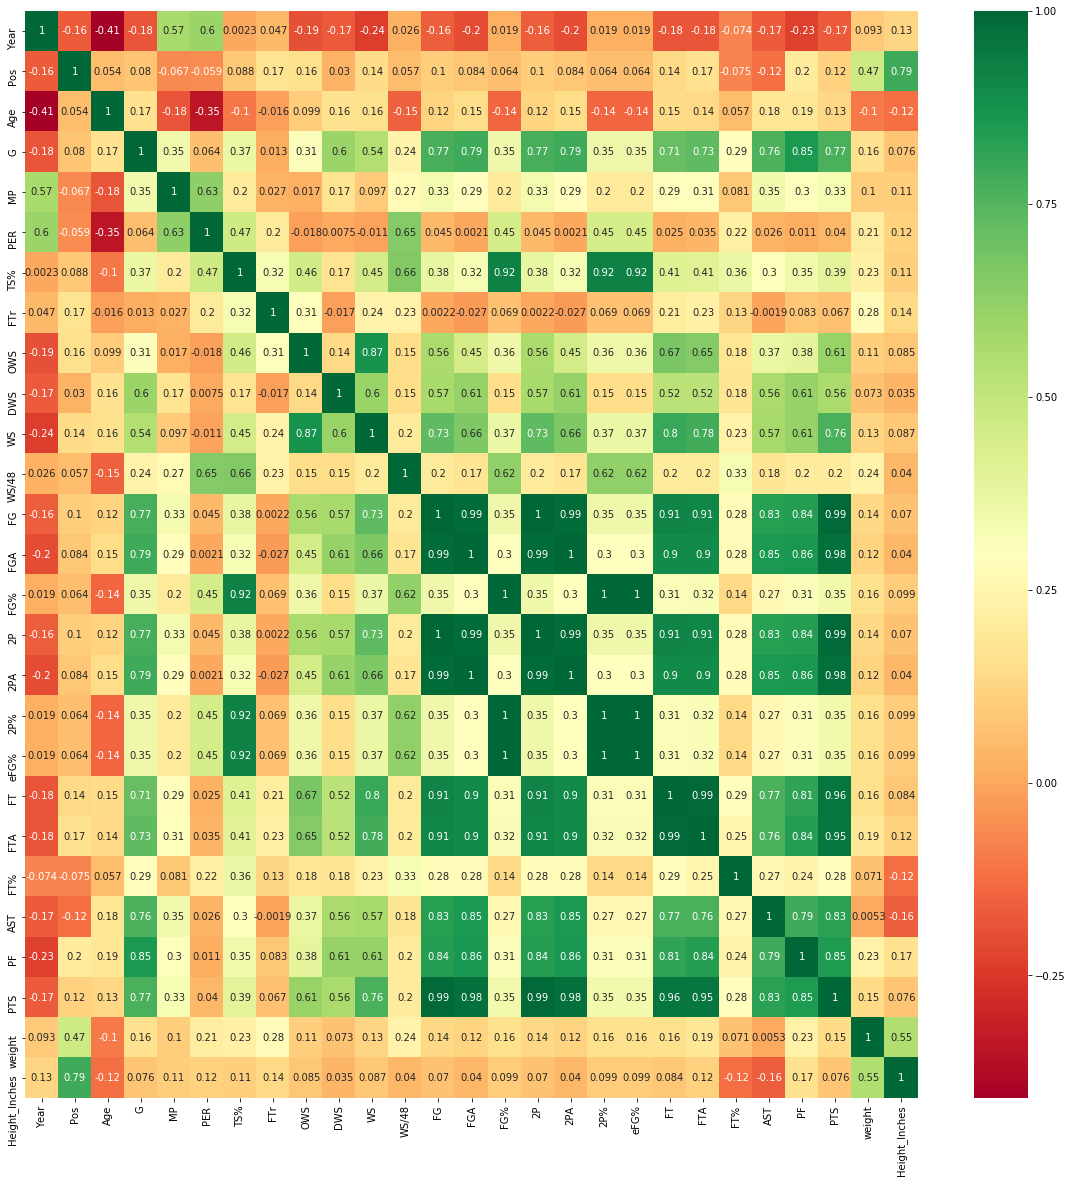

In [46]:
heatmap(NBA_1950_1956)

#### KNN (1950-1956

Accuracy is :46.75%
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.40      0.63      0.49        19
           3       0.52      0.59      0.55        29
           4       0.60      0.23      0.33        13
           5       1.00      0.40      0.57        10

   micro avg       0.47      0.47      0.47        77
   macro avg       0.50      0.37      0.39        77
weighted avg       0.52      0.47      0.46        77



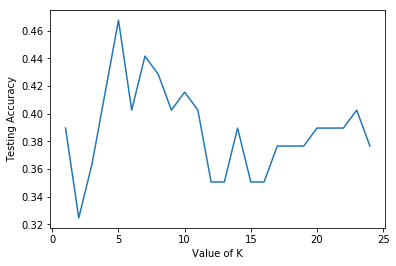

Accuracy is :40.26%
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.30      0.53      0.38        19
           3       0.46      0.55      0.50        29
           4       0.75      0.23      0.35        13
           5       1.00      0.20      0.33        10

   micro avg       0.40      0.40      0.40        77
   macro avg       0.50      0.30      0.31        77
weighted avg       0.50      0.40      0.39        77



Predicted Result,1,2,3,4,5
Actual Result,,,,,
1,0,4,2,0,0
2,1,10,8,0,0
3,1,12,16,0,0
4,1,5,4,3,0
5,0,2,5,1,2


In [55]:
KNN(NBA_1950_1956,X,y)

#### AdaBoost (1950-1956)

In [56]:
ADABOOST(X,y)

Accuracy is :32.47%
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00        26
           3       0.39      0.85      0.53        26
           4       0.15      0.60      0.24         5
           5       0.00      0.00      0.00        14

   micro avg       0.32      0.32      0.32        77
   macro avg       0.11      0.29      0.15        77
weighted avg       0.14      0.32      0.19        77



C:\Users\GBLS\AppData\Local\Continuum\anaconda3\New folder\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\GBLS\AppData\Local\Continuum\anaconda3\New folder\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\GBLS\AppData\Local\Continuum\anaconda3\New folder\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Predicted Result,3,4
Actual Result,,
1,6,0
2,26,0
3,22,4
4,2,3
5,1,13


#### Random Forest (1950-1956)

C:\Users\GBLS\AppData\Local\Continuum\anaconda3\New folder\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy is :51.95%


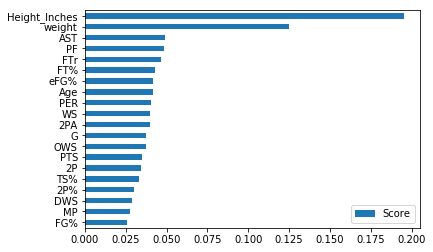

Accuracy is :57.14%


C:\Users\GBLS\AppData\Local\Continuum\anaconda3\New folder\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


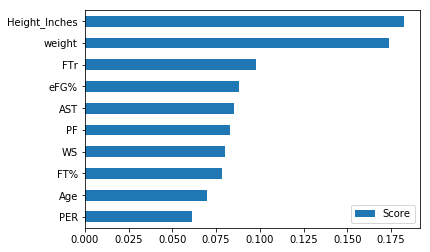

              precision    recall  f1-score   support

           1       0.40      0.50      0.44         4
           2       0.64      0.43      0.51        21
           3       0.49      0.74      0.59        23
           4       0.50      0.45      0.48        11
           5       0.85      0.61      0.71        18

   micro avg       0.57      0.57      0.57        77
   macro avg       0.57      0.55      0.55        77
weighted avg       0.61      0.57      0.57        77



Predicted Result,1,2,3,4,5
Actual Result,,,,,
1,2,2,0,0,0
2,3,9,9,0,0
3,0,3,17,2,1
4,0,0,5,5,1
5,0,0,4,3,11


In [40]:
random_forest(NBA_1950_1956,X,y)

#### SVM (1950-1956)

In [49]:
SVM(NBA_1950_1956,X,y)

Accuracy is :54.55%
              precision    recall  f1-score   support

           1       0.40      0.40      0.40         5
           2       0.67      0.57      0.62        28
           3       0.49      0.75      0.59        24
           4       0.50      0.17      0.25        12
           5       0.57      0.50      0.53         8

   micro avg       0.55      0.55      0.55        77
   macro avg       0.52      0.48      0.48        77
weighted avg       0.56      0.55      0.53        77



AdaBoost

In [44]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [45]:
adaboost_clf = AdaBoostClassifier()
adaboost_mean_cv_score = np.mean(cross_val_score(adaboost_clf, X, y, cv=3))
print("Mean Cross Validation Score for AdaBoost: {:.4}%".format(adaboost_mean_cv_score * 100))

Mean Cross Validation Score for AdaBoost: 43.73%


In [46]:
adaboost_param_grid = {
    'n_estimators': [75, 80, 100, 250],
    'learning_rate': [1.0, .25 ,0.5, 0.1]
}

In [47]:
adaboost_grid_search = GridSearchCV(adaboost_clf, adaboost_param_grid, cv=3)
adaboost_grid_search.fit(X_scaled, y)

C:\Users\GBLS\AppData\Local\Continuum\anaconda3\New folder\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [75, 80, 100, 250], 'learning_rate': [1.0, 0.25, 0.5, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [48]:
print("Testing Accuracy: {:.4}%".format(adaboost_grid_search.best_score_ * 100))
print("Optimal Parameters: {}".format(adaboost_grid_search.best_params_))

Testing Accuracy: 51.05%
Optimal Parameters: {'learning_rate': 0.5, 'n_estimators': 80}


FEATURE SELECTION

In [49]:
# kmeans(X,5)

In [35]:
#possibly take out PTS

In [51]:
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)
# clf= RandomForestClassifier()
# clf.fit(X_train, y_train)
# preds= clf.predict(X_test)
# acc = round(accuracy_score(preds, y_test) * 100,2)
# print("Accuracy is :{0}%".format(acc))
# print(clf.feature_importances_)
# pd.crosstab(y_test, preds, rownames=['Actual Result'], colnames=['Predicted Result'])

In [52]:
# feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
# feat_importances.plot(kind='barh')
# plt.show()

In [53]:
# feat_importances.nlargest(10).index

In [51]:
# NBA_1950_10_feats=NBA_1950_1956[['AST', 'PF', 'FT%', 'FTr', 'eFG%', 'FT', 'Age', 'FG%', '2P%', 'PER']]

In [53]:
# X=NBA_1950_10_feats




In [54]:
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)
# clf= RandomForestClassifier()
# clf.fit(X_train, y_train)
# preds= clf.predict(X_test)
# acc = round(accuracy_score(preds, y_test) * 100,2)
# print("Accuracy is :{0}%".format(acc))

In [55]:

scaler=StandardScaler()
X_scaled= scaler.fit_transform(X)
pca_1 = PCA(n_components=5)
pca_2 = PCA(n_components=6)
pca_3 = PCA(n_components=7)

principalComponents = pca_1.fit_transform(X_scaled)
principalComponents = pca_2.fit_transform(X_scaled)
principalComponents = pca_3.fit_transform(X_scaled)

print(np.sum(pca_1.explained_variance_ratio_))
print(np.sum(pca_2.explained_variance_ratio_))
print(np.sum(pca_3.explained_variance_ratio_))

pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X_scaled)
print(np.sum(pca.explained_variance_ratio_))

0.7951236788604348
0.8425831922962347
0.8807845799589604
0.7951236788604348


In [ ]:
print(model.feature_importances_)

In [57]:
# pipe_rf = Pipeline([('pca', PCA(n_components=10, random_state=123)),
#          ('clf', RandomForestClassifier(n_estimators=,random_state=123))])
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)

# param_grid_forest = [ 
#   {'clf__n_estimators': [10,15,20],
#    'clf__criterion': ['entropy', 'gini'], 
#    'clf__max_depth': [10, 15, 20],  
#    'clf__min_samples_leaf':[50],  
#    'clf__min_samples_split':[0.05 ,0.1, 0.2],
#    'clf__max_features':[10]
#   }
# ]
# gs_rf = GridSearchCV(estimator=pipe_rf,
#             param_grid=param_grid_forest,
#             scoring='accuracy',
#             cv=3, verbose=2, return_train_score = True)

# # Fit using grid search
# gs_rf.fit(X_train, y_train)

# # Best accuracy
# print('Best accuracy: %.3f' % gs_rf.best_score_)

# # Best params
# print('\nBest params:\n', gs_rf.best_params_)

In [59]:
# # Construct pipeline
# pipe_ab = Pipeline([('pca', PCA(n_components=9)),
#             ('clf', AdaBoostClassifier(random_state = 0))])

# # Set grid search params
# adaboost_param_grid = {
#     'clf__n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13],
#     'clf__learning_rate': [1.0, 0.5, 0.1]
# }

# # Construct grid search
# gs_ab = GridSearchCV(estimator=pipe_ab,
#             param_grid=adaboost_param_grid,
#             scoring='accuracy',
#             cv=3, verbose=2, return_train_score = True)

# # Fit using grid search
# gs_ab.fit(X_train, y_train)

# # Best accuracy
# print('Best accuracy: %.3f' % gs_ab.best_score_)

# # Best params
# print('\nBest params:\n', gs_ab.best_params_)

### NBA 1957-1979

In [57]:
NBA_1957_1979.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,weight,Height_Inches
382,1957.0,Forest Able,G,24.0,SYR,1.0,NaN,1.0,-41.1,0.000,...,NaN,1.0,1.0,NaN,NaN,NaN,1.0,0.0,180.0,75.0
383,1957.0,Bob Armstrong,C-F,23.0,PHW,19.0,NaN,110.0,7.8,0.331,...,NaN,39.0,3.0,NaN,NaN,NaN,13.0,28.0,220.0,80.0
384,1957.0,John Barber,F,29.0,STL,5.0,NaN,19.0,4.2,0.329,...,NaN,6.0,0.0,NaN,NaN,NaN,4.0,7.0,210.0,78.0
385,1957.0,Gary Bergen,C,24.0,NYK,6.0,NaN,40.0,4.7,0.337,...,NaN,8.0,1.0,NaN,NaN,NaN,4.0,8.0,210.0,80.0
386,1957.0,Al Bianchi,PG,24.0,SYR,68.0,NaN,1577.0,9.6,0.419,...,NaN,227.0,106.0,NaN,NaN,NaN,198.0,563.0,185.0,75.0


In [58]:
NBA_1957_1979.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 865 entries, 382 to 1246
Data columns (total 52 columns):
Year             865 non-null float64
Player           865 non-null object
Pos              865 non-null object
Age              865 non-null float64
Tm               865 non-null object
G                865 non-null float64
GS               0 non-null float64
MP               865 non-null float64
PER              865 non-null float64
TS%              864 non-null float64
3PAr             0 non-null float64
FTr              862 non-null float64
ORB%             351 non-null float64
DRB%             351 non-null float64
TRB%             502 non-null float64
AST%             686 non-null float64
STL%             351 non-null float64
BLK%             351 non-null float64
TOV%             109 non-null float64
USG%             110 non-null float64
OWS              865 non-null float64
DWS              865 non-null float64
WS               865 non-null float64
WS/48            865 non-

In [59]:
NBA_1957_1979.isna().sum()

Year               0
Player             0
Pos                0
Age                0
Tm                 0
G                  0
GS               865
MP                 0
PER                0
TS%                1
3PAr             865
FTr                3
ORB%             514
DRB%             514
TRB%             363
AST%             179
STL%             514
BLK%             514
TOV%             756
USG%             755
OWS                0
DWS                0
WS                 0
WS/48              0
OBPM             514
DBPM             514
BPM              514
VORP             514
FG                 0
FGA                0
FG%                3
3P               865
3PA              865
3P%              865
2P                 0
2PA                0
2P%                3
eFG%               3
FT                 0
FTA                0
FT%               34
ORB              514
DRB              514
TRB                0
AST                0
STL              514
BLK              514
TOV          

In [60]:
NBA_1957_1979=NBA_1957_1979.drop(['3P','3PA','3P%','3PAr','GS','ORB%','DRB%','TOV','BLK','STL','DRB','ORB','VORP','BPM','DBPM','OBPM','TRB','STL%','BLK%','TOV%','USG%'], axis=1)

In [61]:
NBA_1957_1979.isna().sum()

Year               0
Player             0
Pos                0
Age                0
Tm                 0
G                  0
MP                 0
PER                0
TS%                1
FTr                3
TRB%             363
AST%             179
OWS                0
DWS                0
WS                 0
WS/48              0
FG                 0
FGA                0
FG%                3
2P                 0
2PA                0
2P%                3
eFG%               3
FT                 0
FTA                0
FT%               34
AST                0
PF                 0
PTS                0
weight             0
Height_Inches      0
dtype: int64

In [62]:
NBA_1957_1979=NBA_1957_1979.fillna(0)

In [63]:
NBA_1957_1979.isna().sum()

Year             0
Player           0
Pos              0
Age              0
Tm               0
G                0
MP               0
PER              0
TS%              0
FTr              0
TRB%             0
AST%             0
OWS              0
DWS              0
WS               0
WS/48            0
FG               0
FGA              0
FG%              0
2P               0
2PA              0
2P%              0
eFG%             0
FT               0
FTA              0
FT%              0
AST              0
PF               0
PTS              0
weight           0
Height_Inches    0
dtype: int64

In [64]:
Position_num(NBA_1957_1979)

C:\Users\GBLS\AppData\Local\Continuum\anaconda3\New folder\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [65]:
X= NBA_1957_1979.drop(['Tm','Player','Pos'], axis=1)
y= NBA_1957_1979['Pos']


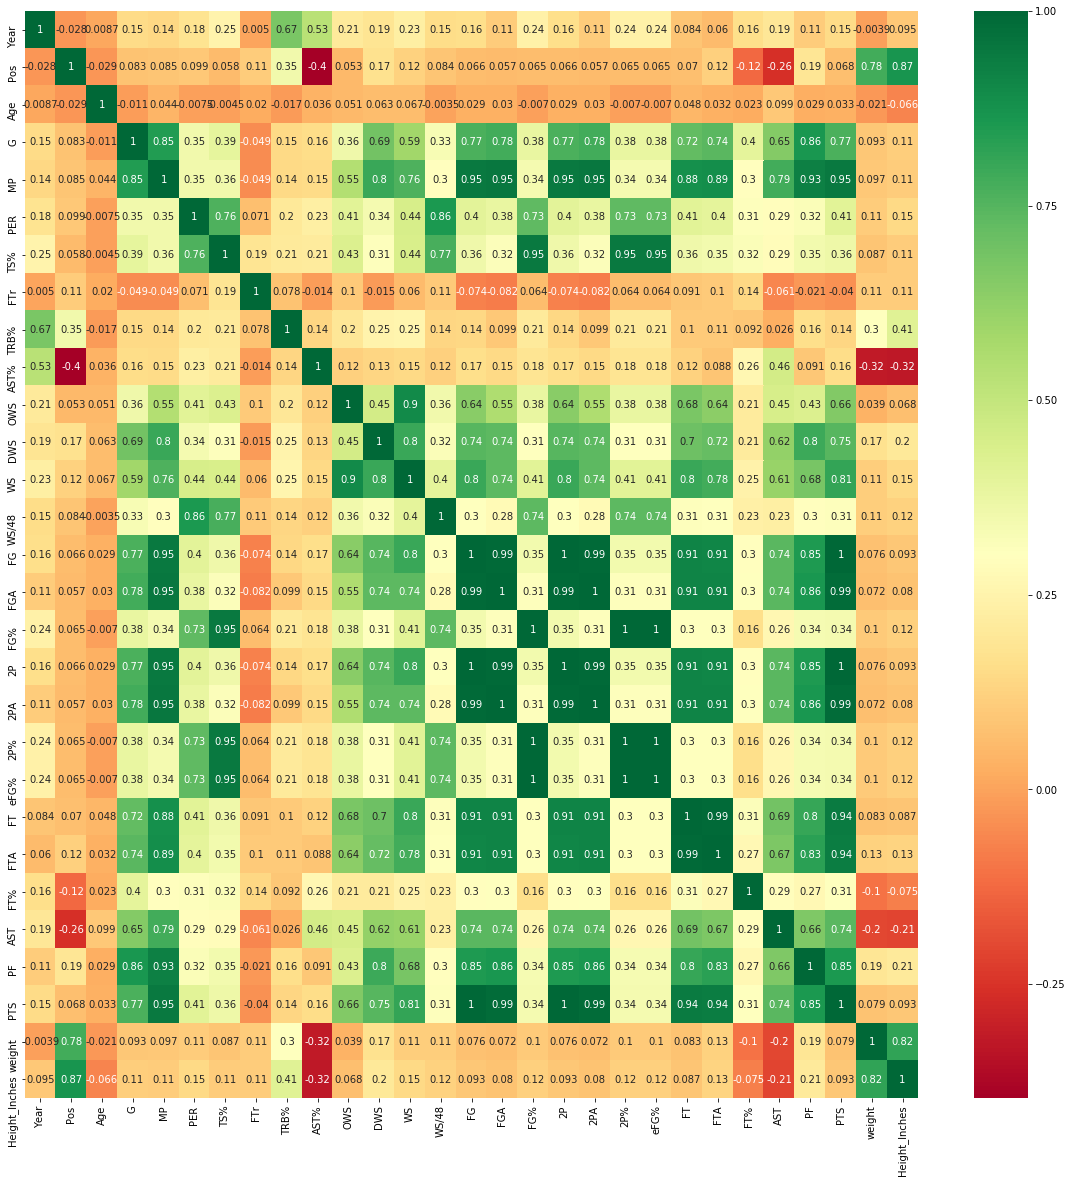

In [66]:
heatmap(NBA_1957_1979)

#### KNN (1957-1979)

Accuracy is :36.99%
              precision    recall  f1-score   support

           1       0.47      0.28      0.35        25
           2       0.42      0.58      0.49        52
           3       0.39      0.42      0.40        48
           4       0.21      0.20      0.20        25
           5       0.17      0.09      0.11        23

   micro avg       0.37      0.37      0.37       173
   macro avg       0.33      0.31      0.31       173
weighted avg       0.36      0.37      0.35       173



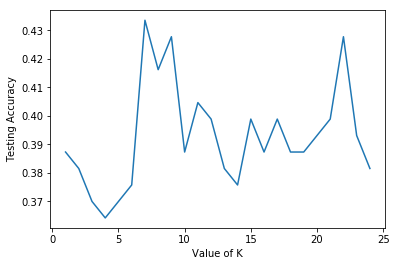

Accuracy is :37.57%
              precision    recall  f1-score   support

           1       0.44      0.32      0.37        25
           2       0.40      0.52      0.45        52
           3       0.41      0.48      0.44        48
           4       0.15      0.12      0.13        25
           5       0.33      0.17      0.23        23

   micro avg       0.38      0.38      0.38       173
   macro avg       0.35      0.32      0.33       173
weighted avg       0.37      0.38      0.36       173



Predicted Result,1,2,3,4,5
Actual Result,,,,,
1,8,14,1,2,0
2,9,27,12,3,1
3,1,17,23,5,2
4,0,5,12,3,5
5,0,4,8,7,4


In [67]:
KNN(NBA_1957_1979,X,y)

#### Adaboost (1957-1979)

In [68]:
ADABOOST(X,y)

Accuracy is :51.45%
              precision    recall  f1-score   support

           1       0.54      0.48      0.51        27
           2       0.67      0.30      0.42        46
           3       0.39      0.85      0.53        39
           4       0.61      0.31      0.42        35
           5       0.72      0.69      0.71        26

   micro avg       0.51      0.51      0.51       173
   macro avg       0.59      0.53      0.52       173
weighted avg       0.58      0.51      0.50       173



Predicted Result,1,2,3,4,5
Actual Result,,,,,
1,13,3,11,0,0
2,11,14,21,0,0
3,0,3,33,2,1
4,0,0,18,11,6
5,0,1,2,5,18


#### Random Forest (1957-1979)

C:\Users\GBLS\AppData\Local\Continuum\anaconda3\New folder\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy is :52.6%


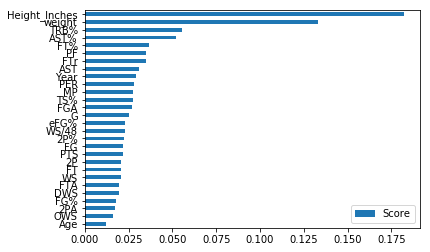

Accuracy is :67.05%


C:\Users\GBLS\AppData\Local\Continuum\anaconda3\New folder\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


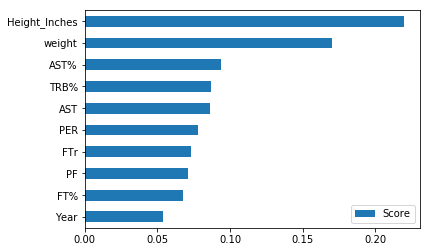

              precision    recall  f1-score   support

           1       0.60      0.57      0.59        21
           2       0.75      0.66      0.70        50
           3       0.62      0.80      0.70        44
           4       0.54      0.42      0.47        31
           5       0.79      0.85      0.82        27

   micro avg       0.67      0.67      0.67       173
   macro avg       0.66      0.66      0.66       173
weighted avg       0.67      0.67      0.66       173



Predicted Result,1,2,3,4,5
Actual Result,,,,,
1,12,9,0,0,0
2,8,33,9,0,0
3,0,1,35,8,0
4,0,1,11,13,6
5,0,0,1,3,23


In [59]:
random_forest(NBA_1957_1979,X,y)

#### SVM (1957-1979)

In [60]:
SVM(NBA_1957_1979,X,y)

Accuracy is :61.85%
              precision    recall  f1-score   support

           1       0.43      0.33      0.38        18
           2       0.58      0.73      0.65        48
           3       0.64      0.58      0.61        48
           4       0.56      0.52      0.54        29
           5       0.82      0.77      0.79        30

   micro avg       0.62      0.62      0.62       173
   macro avg       0.61      0.59      0.59       173
weighted avg       0.62      0.62      0.62       173



### NBA 1980-1998

In [61]:
NBA_1980_1998.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,weight,Height_Inches
1247,1980.0,James Bailey,PF,22.0,SEA,67.0,NaN,726.0,12.3,0.495,...,126.0,197.0,28.0,21.0,54.0,79.0,116.0,312.0,220.0,81.0
1248,1980.0,Lawrence Boston,PF,23.0,WSB,13.0,NaN,125.0,12.6,0.485,...,20.0,39.0,2.0,4.0,2.0,8.0,25.0,56.0,225.0,80.0
1249,1980.0,Dudley Bradley,SG,22.0,IND,82.0,NaN,2027.0,13.5,0.502,...,154.0,223.0,252.0,211.0,48.0,166.0,194.0,688.0,195.0,78.0
1250,1980.0,Bill Cartwright,C,22.0,NYK,82.0,NaN,3150.0,17.9,0.608,...,532.0,726.0,165.0,48.0,101.0,222.0,279.0,1781.0,245.0,85.0
1251,1980.0,Jeff Cook,PF,23.0,PHO,66.0,NaN,904.0,14.4,0.546,...,151.0,241.0,84.0,28.0,18.0,71.0,102.0,362.0,215.0,82.0


In [62]:
NBA_1980_1998.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1227 entries, 1247 to 2473
Data columns (total 52 columns):
Year             1227 non-null float64
Player           1227 non-null object
Pos              1227 non-null object
Age              1227 non-null float64
Tm               1227 non-null object
G                1227 non-null float64
GS               1103 non-null float64
MP               1227 non-null float64
PER              1227 non-null float64
TS%              1221 non-null float64
3PAr             1220 non-null float64
FTr              1220 non-null float64
ORB%             1227 non-null float64
DRB%             1227 non-null float64
TRB%             1227 non-null float64
AST%             1227 non-null float64
STL%             1227 non-null float64
BLK%             1227 non-null float64
TOV%             1223 non-null float64
USG%             1227 non-null float64
OWS              1227 non-null float64
DWS              1227 non-null float64
WS               1227 non-null floa

In [63]:
NBA_1980_1998.isna().sum()

Year               0
Player             0
Pos                0
Age                0
Tm                 0
G                  0
GS               124
MP                 0
PER                0
TS%                6
3PAr               7
FTr                7
ORB%               0
DRB%               0
TRB%               0
AST%               0
STL%               0
BLK%               0
TOV%               4
USG%               0
OWS                0
DWS                0
WS                 0
WS/48              0
OBPM               0
DBPM               0
BPM                0
VORP               0
FG                 0
FGA                0
FG%                7
3P                 0
3PA                0
3P%              315
2P                 0
2PA                0
2P%                8
eFG%               7
FT                 0
FTA                0
FT%               63
ORB                0
DRB                0
TRB                0
AST                0
STL                0
BLK                0
TOV          

In [64]:
NBA_1980_1998.fillna(0, inplace=True)

C:\Users\GBLS\AppData\Local\Continuum\anaconda3\New folder\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [69]:
Position_num(NBA_1980_1998)

C:\Users\GBLS\AppData\Local\Continuum\anaconda3\New folder\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\GBLS\AppData\Local\Continuum\anaconda3\New folder\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [70]:
X= NBA_1980_1998.drop(['Tm','Player','Pos'], axis=1)
y= NBA_1980_1998['Pos']

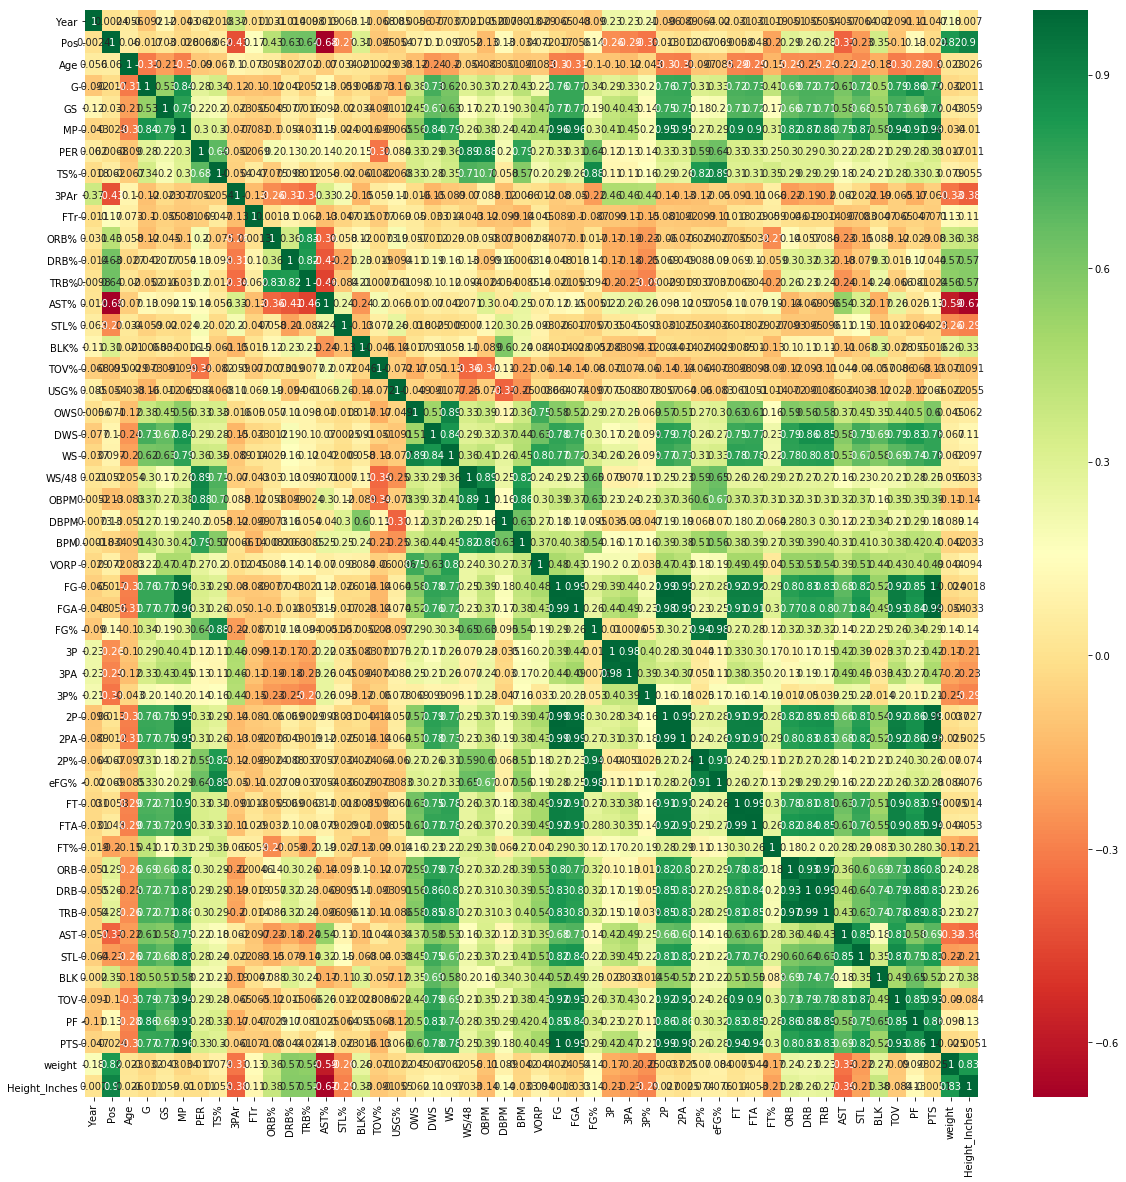

In [71]:
heatmap(NBA_1980_1998)

#### KNN (1980-1998)

In [ ]:
KNN(NBA_1980_1998,X,y)

#### Adaboost (19801998)

In [69]:
ADABOOST(X,y)

Accuracy is :46.82%
              precision    recall  f1-score   support

           1       0.44      0.32      0.37        22
           2       0.67      0.26      0.38        53
           3       0.36      0.95      0.53        41
           4       0.33      0.03      0.06        29
           5       0.77      0.71      0.74        28

   micro avg       0.47      0.47      0.47       173
   macro avg       0.51      0.46      0.42       173
weighted avg       0.53      0.47      0.42       173



Predicted Result,1,2,3,4,5
Actual Result,,,,,
1,7,5,10,0,0
2,8,14,31,0,0
3,1,0,39,0,1
4,0,0,23,1,5
5,0,2,4,2,20


#### Random Forest (1980-1998)

C:\Users\GBLS\AppData\Local\Continuum\anaconda3\New folder\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy is :72.76%


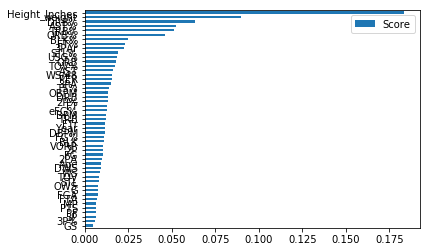

Accuracy is :69.51%


C:\Users\GBLS\AppData\Local\Continuum\anaconda3\New folder\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


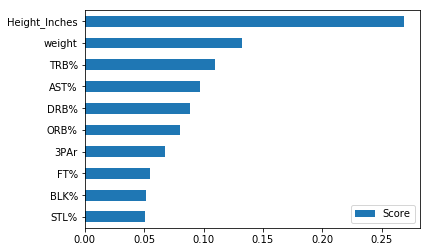

              precision    recall  f1-score   support

           1       0.76      0.76      0.76        37
           2       0.66      0.66      0.66        50
           3       0.71      0.67      0.69        54
           4       0.61      0.67      0.64        54
           5       0.78      0.75      0.76        51

   micro avg       0.70      0.70      0.70       246
   macro avg       0.70      0.70      0.70       246
weighted avg       0.70      0.70      0.70       246



Predicted Result,1,2,3,4,5
Actual Result,,,,,
1,28,8,1,0,0
2,9,33,7,1,0
3,0,9,36,9,0
4,0,0,7,36,11
5,0,0,0,13,38


In [72]:
random_forest(NBA_1980_1998,X,y)

#### SVM (1980-1998)

In [73]:
SVM(NBA_1980_1998,X,y)

Accuracy is :74.39%
              precision    recall  f1-score   support

           1       0.83      0.81      0.82        43
           2       0.67      0.76      0.71        62
           3       0.71      0.63      0.67        57
           4       0.74      0.77      0.76        48
           5       0.85      0.78      0.81        36

   micro avg       0.74      0.74      0.74       246
   macro avg       0.76      0.75      0.75       246
weighted avg       0.75      0.74      0.74       246



### NBA 1999-2017

In [74]:
NBA_1999_2017.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,weight,Height_Inches
2474,1999.0,Peter Aluma,C,25.0,SAC,2.0,0.0,5.0,3.1,0.500,...,1.0,2.0,0.0,1.0,1.0,2.0,4.0,2.0,260.0,82.0
2475,1999.0,Toby Bailey,SG,23.0,PHO,27.0,10.0,249.0,11.3,0.425,...,30.0,54.0,13.0,9.0,2.0,11.0,24.0,78.0,213.0,78.0
2476,1999.0,LaMark Baker,PG,29.0,TOR,1.0,0.0,2.0,-46.6,0.000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,175.0,73.0
2477,1999.0,Corey Benjamin,PG,20.0,CHI,31.0,1.0,320.0,8.3,0.438,...,25.0,40.0,10.0,11.0,8.0,21.0,46.0,118.0,200.0,78.0
2478,1999.0,Mike Bibby,PG,20.0,VAN,50.0,50.0,1758.0,14.8,0.487,...,106.0,136.0,325.0,78.0,5.0,146.0,122.0,662.0,190.0,73.0


In [75]:
NBA_1999_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1339 entries, 2474 to 3812
Data columns (total 52 columns):
Year             1339 non-null float64
Player           1339 non-null object
Pos              1339 non-null object
Age              1339 non-null float64
Tm               1339 non-null object
G                1339 non-null float64
GS               1339 non-null float64
MP               1339 non-null float64
PER              1337 non-null float64
TS%              1328 non-null float64
3PAr             1327 non-null float64
FTr              1327 non-null float64
ORB%             1337 non-null float64
DRB%             1337 non-null float64
TRB%             1337 non-null float64
AST%             1337 non-null float64
STL%             1337 non-null float64
BLK%             1337 non-null float64
TOV%             1329 non-null float64
USG%             1337 non-null float64
OWS              1339 non-null float64
DWS              1339 non-null float64
WS               1339 non-null floa

In [76]:
NBA_1999_2017.isna().sum()

Year               0
Player             0
Pos                0
Age                0
Tm                 0
G                  0
GS                 0
MP                 0
PER                2
TS%               11
3PAr              12
FTr               12
ORB%               2
DRB%               2
TRB%               2
AST%               2
STL%               2
BLK%               2
TOV%              10
USG%               2
OWS                0
DWS                0
WS                 0
WS/48              2
OBPM               0
DBPM               0
BPM                0
VORP               0
FG                 0
FGA                0
FG%               12
3P                 0
3PA                0
3P%              300
2P                 0
2PA                0
2P%               15
eFG%              12
FT                 0
FTA                0
FT%              108
ORB                0
DRB                0
TRB                0
AST                0
STL                0
BLK                0
TOV          

In [77]:
NBA_1999_2017=NBA_1999_2017.fillna(0)

In [78]:
Position_num(NBA_1999_2017)

C:\Users\GBLS\AppData\Local\Continuum\anaconda3\New folder\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [79]:
X=NBA_1999_2017.drop(['Pos','Year','Tm','Player'], axis=1) #,'FTA','FT','FGA','FG','WS/48'
y=NBA_1999_2017['Pos']

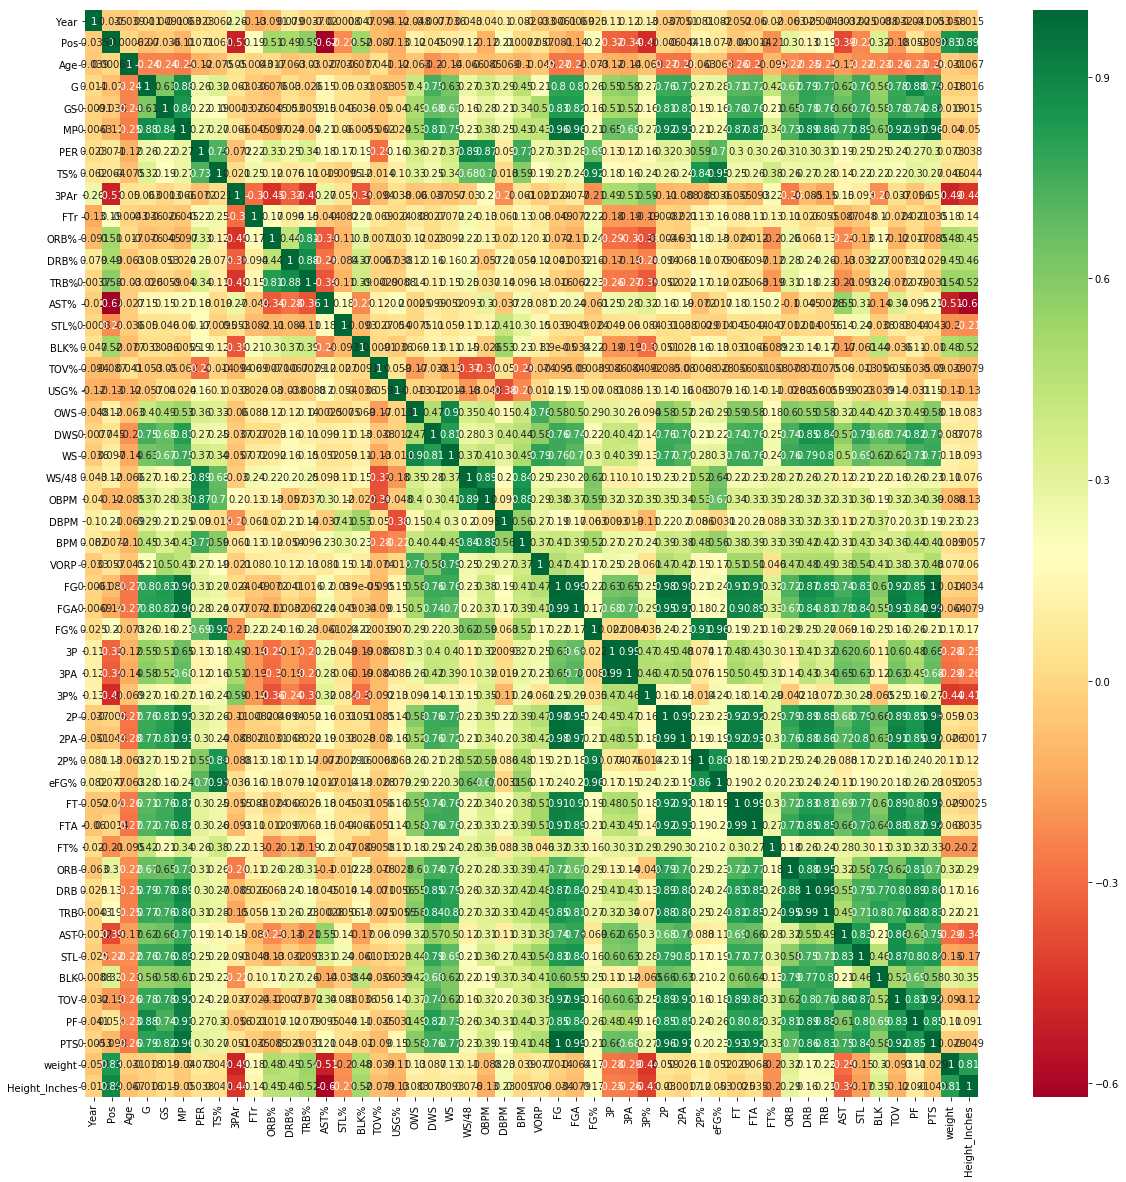

In [81]:
heatmap(NBA_1999_2017)

#### KNN (1999-2017)

Accuracy is :36.42%
              precision    recall  f1-score   support

           1       0.38      0.29      0.33        31
           2       0.40      0.40      0.40        48
           3       0.40      0.51      0.45        45
           4       0.25      0.23      0.24        30
           5       0.31      0.26      0.29        19

   micro avg       0.36      0.36      0.36       173
   macro avg       0.35      0.34      0.34       173
weighted avg       0.36      0.36      0.36       173



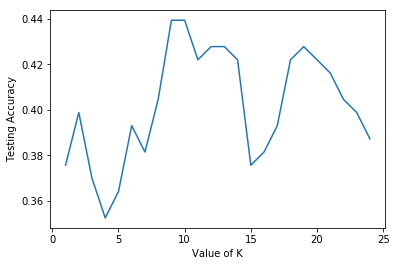

Accuracy is :39.31%
              precision    recall  f1-score   support

           1       0.39      0.35      0.37        31
           2       0.43      0.42      0.43        48
           3       0.46      0.58      0.51        45
           4       0.24      0.17      0.20        30
           5       0.29      0.32      0.30        19

   micro avg       0.39      0.39      0.39       173
   macro avg       0.36      0.37      0.36       173
weighted avg       0.38      0.39      0.38       173



Predicted Result,1,2,3,4,5
Actual Result,,,,,
1,11,13,3,3,1
2,12,20,10,4,2
3,1,7,26,3,8
4,2,5,14,5,4
5,2,1,4,6,6


In [71]:
KNN(NBA_1999_2017,X,y)

#### Adaboost (1999-2017)

In [70]:
ADABOOST(X,y)

Accuracy is :59.54%
              precision    recall  f1-score   support

           1       0.70      0.28      0.40        25
           2       0.58      0.78      0.67        45
           3       0.60      0.71      0.65        49
           4       0.33      0.30      0.32        23
           5       0.79      0.61      0.69        31

   micro avg       0.60      0.60      0.60       173
   macro avg       0.60      0.54      0.55       173
weighted avg       0.61      0.60      0.58       173



Predicted Result,1,2,3,4,5
Actual Result,,,,,
1,7,17,0,1,0
2,2,35,7,1,0
3,1,5,35,7,1
4,0,0,12,7,4
5,0,3,4,5,19


#### Random Forest (1999-2017)

C:\Users\GBLS\AppData\Local\Continuum\anaconda3\New folder\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy is :63.43%


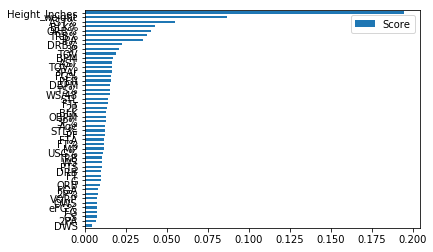

Accuracy is :75.0%


C:\Users\GBLS\AppData\Local\Continuum\anaconda3\New folder\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


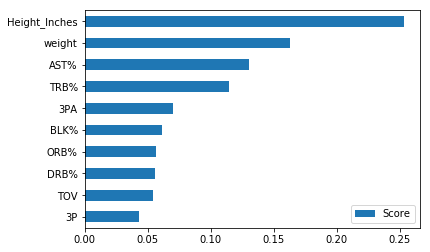

              precision    recall  f1-score   support

           1       0.85      0.90      0.88        52
           2       0.73      0.70      0.72        47
           3       0.67      0.71      0.69        48
           4       0.72      0.68      0.70        68
           5       0.77      0.77      0.77        53

   micro avg       0.75      0.75      0.75       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.75      0.75      0.75       268



Predicted Result,1,2,3,4,5
Actual Result,,,,,
1,47,5,0,0,0
2,8,33,6,0,0
3,0,6,34,7,1
4,0,0,11,46,11
5,0,1,0,11,41


In [82]:
random_forest(NBA_1999_2017,X,y)

#### SVM (1999-2017)

In [83]:
SVM(NBA_1999_2017, X, y)

Accuracy is :73.51%
              precision    recall  f1-score   support

           1       0.89      0.89      0.89        57
           2       0.81      0.66      0.72        64
           3       0.55      0.65      0.59        46
           4       0.63      0.75      0.68        51
           5       0.82      0.72      0.77        50

   micro avg       0.74      0.74      0.74       268
   macro avg       0.74      0.73      0.73       268
weighted avg       0.75      0.74      0.74       268



## Feature Selection

### Using PCA

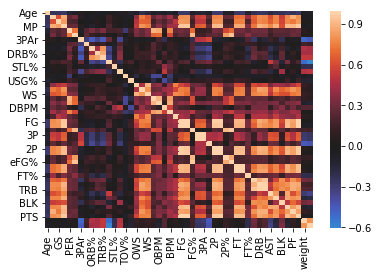

In [94]:
import seaborn as sns
features= X
sns.heatmap(X.corr(), center=0)

In [95]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scalar= StandardScaler()
X_scaled=scalar.fit_transform(X)
#47 total features
pca_1= PCA(n_components= 7)
pca_2= PCA(n_components= 10)
pca_3= PCA(n_components= 15)

principleComponents= pca_1.fit_transform(X_scaled)
principleComponents= pca_2.fit_transform(X_scaled)
principleComponents= pca_3.fit_transform(X_scaled)

print(np.sum(pca_1.explained_variance_ratio_))
print(np.sum(pca_2.explained_variance_ratio_))
print(np.sum(pca_3.explained_variance_ratio_))

0.7757112912354149
0.8452439853447843
0.922516397534103


In [96]:
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X_scaled)
print(np.sum(pca.explained_variance_ratio_))

0.8452431051433537


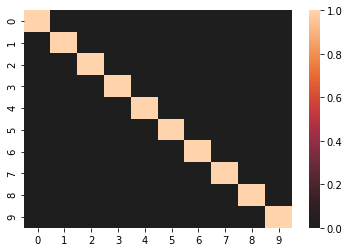

In [97]:
sns.heatmap(pd.DataFrame(principalComponents).corr(), center=0)

## PCA for KNN

In [98]:
from sklearn.pipeline import Pipeline
pca=PCA(n_components=15)
clf= KMeans(n_clusters=5)
X_pca_test= pca.fit_transform(X_test)
X_pca_train= pca.fit_transform(X_train)
clf.fit(X_pca_train)

labels = clf.labels_

metrics.silhouette_score(X_pca_train, labels, metric='euclidean')

0.52965692671484

In [99]:
clf.fit(X_pca_test)
labels_test= clf.labels_

metrics.silhouette_score(X_pca_test, labels_test, metric='euclidean')

0.5851703498642387

## PCA for Random Forest

## Adv. Modeling

1. Preprocessed Data (Check)
2. Subset Data aka Choose 10 Features 
3. Train Test Split
4. Build the Model
    a. Tune the Model
    b. Pipeline
    c. Grid Search
5. Predict
6. Check Accuracy

Also want to basically feed in a single unmarked player and see what it tells me their position is maybe like a college player
